# Importing Libraries and Databases

In [142]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [143]:
# Configure API key 

quandl.ApiConfig.api_key = 'ybgCtccxwR8nvs9X3MkM'

In [144]:
# Importing databases
# creating a path
path=r'C:\Users\William\July-2023 Airbnb Amsterdam'

In [145]:
# Importing dataframe without '$'
df_calendar=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_calendar_3_cleaned.csv'), index_col = False)

# Data Check

In [146]:
# Identifying missing values in Calenders database
df_calendar.isnull().sum()

datetime      0
index         0
listing_id    0
price         0
dtype: int64

In [147]:
# checking shape
df_calendar.shape

(1048575, 4)

In [148]:
df_calendar.head(5)

,datetime,index,listing_id,price
0,2018-12-06,1327,2818,59
1,2018-12-06,5074,75444,67
2,2018-12-06,5579,76668,135
3,2018-12-06,8030,262562,190
4,2018-12-06,9855,266087,125


In [149]:
# dropping unnecesary columns
df_calendar.drop('index', axis=1, inplace=True)

In [150]:
df_calendar.drop('listing_id', axis=1, inplace=True)

In [151]:
df_calendar.head(5)

,datetime,price
0,2018-12-06,59
1,2018-12-06,67
2,2018-12-06,135
3,2018-12-06,190
4,2018-12-06,125


In [152]:
# checking columns
df_calendar.columns

Index(['datetime', 'price'], dtype='object')

In [153]:
# renaming column
df_calendar.rename(columns={"datetime": "date"})

,date,price
0,2018-12-06,59
1,2018-12-06,67
2,2018-12-06,135
3,2018-12-06,190
4,2018-12-06,125
...,...,...
1048570,2019-12-06,150
1048571,2019-12-06,700
1048572,2019-12-06,70
1048573,2019-12-06,197


In [154]:
# checking type
type(df_calendar)

pandas.core.frame.DataFrame

In [155]:
# Reset index so that you can use the "Date" column as a filter

df_calendar_2 = df_calendar.reset_index()

In [156]:
# checking index
df_calendar_2.head(5)

,index,datetime,price
0,0,2018-12-06,59
1,1,2018-12-06,67
2,2,2018-12-06,135
3,3,2018-12-06,190
4,4,2018-12-06,125


In [157]:
# dropping unnecesary columns
df_calendar_2.drop('index', axis=1, inplace=True)

In [158]:
df_calendar_2.head(5)

,datetime,price
0,2018-12-06,59
1,2018-12-06,67
2,2018-12-06,135
3,2018-12-06,190
4,2018-12-06,125


In [159]:
# renaming column
df_calendar_3 = df_calendar_2.rename(columns={"datetime": "date"})

In [160]:
df_calendar_3.head(5)

,date,price
0,2018-12-06,59
1,2018-12-06,67
2,2018-12-06,135
3,2018-12-06,190
4,2018-12-06,125


In [161]:
# Set the "Date" column as the index

from datetime import datetime

df_calendar_3['datetime'] = pd.to_datetime(df_calendar_3['date']) # Create a datetime column from "Date.""
df_calendar_3 = df_calendar_3.set_index('datetime') # Set the datetime as the index of the dataframe.
df_calendar_3.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_calendar_3.head()

,price
datetime,
2018-12-06,59
2018-12-06,67
2018-12-06,135
2018-12-06,190
2018-12-06,125


In [162]:
df_calendar_3['price']= pd.to_numeric(df_calendar_3['price'], errors='coerce')

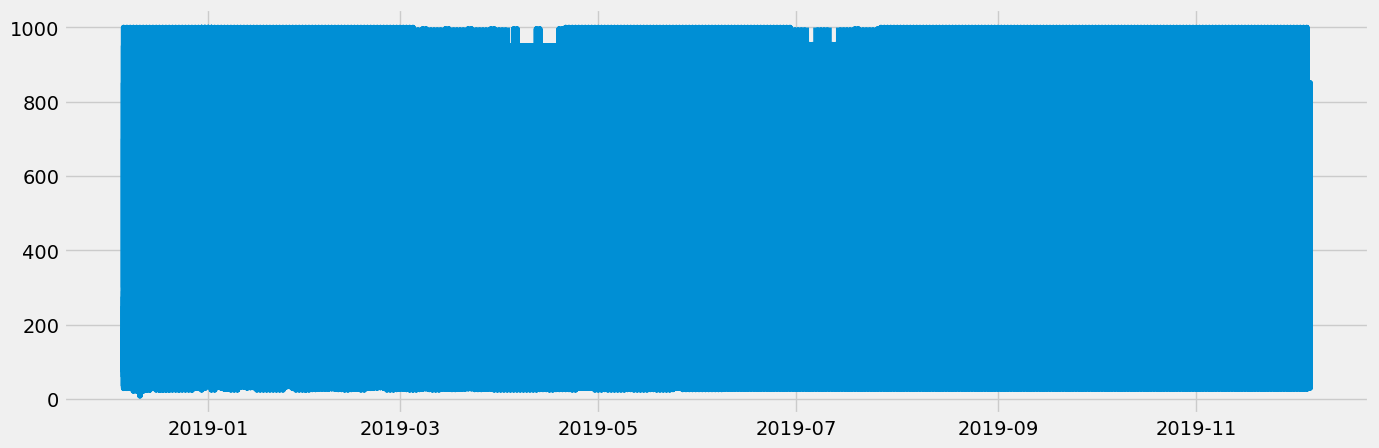

In [163]:
# Plot the data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_calendar_3)

# Decomposition

In [164]:
# Check for missing values

df_calendar_3.isnull().sum() 

price    8203
dtype: int64

In [165]:
df_calendar_4=df_calendar_3.dropna()

In [166]:
# Check for missing values (you shouldn't have any)

df_calendar_4.isnull().sum() 

price    0
dtype: int64

In [167]:
df_calendar_4.head()

,price
datetime,
2018-12-06,59.0
2018-12-06,67.0
2018-12-06,135.0
2018-12-06,190.0
2018-12-06,125.0


In [168]:
df_calendar_4.shape

(1040372, 1)

In [172]:
# define period
df_calendar_5 = df_calendar_4.loc[(df_calendar_4['datetime'] >= '2018-12-01') & (df_calendar_4['datetime'] < '2019-12-31')]

KeyError: 'datetime'

In [141]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_calendar_5, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None